In [196]:
import numpy as np
dataset_filename = r'.\datasets\chapter_1\affinity_dataset.txt'
X = np.loadtxt(dataset_filename)

In [197]:
n_samples, n_features = X.shape

In [198]:
print(X[:5])

[[0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]]


In [199]:
features = ["bread", "milk", "cheese", "apples", "bananas"]
sample = X[2]

In [200]:
sample[4]

1.0

In [201]:
from collections import defaultdict
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

In [202]:
for sample in X:
    for premise in range(n_features):
        if sample[premise] == 0:
            continue
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:  
                continue
            if sample[conclusion] == 1:
                valid_rules[(premise, conclusion)] += 1

In [203]:
support = valid_rules

In [204]:
confidence = defaultdict(float)
for premise, conclusion in valid_rules.keys():
    rule = (premise, conclusion)
    confidence[rule] = valid_rules[rule]/num_occurences[premise]

In [205]:
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))


In [206]:
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

Rule: If a person buys bread they will also buy milk
 - Confidence: 0.464
 - Support: 13

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.250
 - Support: 13

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.351
 - Support: 20

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.512
 - Support: 22

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18

Rule: If a person buys apples they will also buy milk
 - Confidence: 0.419
 - Support: 18

Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519


In [207]:
from operator import itemgetter
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

In [208]:
for index in range(5):
    print("Rule #{0}".format(index+1))
    premise, conclusion = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Support: 27
 - Confidence: 0.628
Rule #2
Rule: If a person buys bananas they will also buy apples
 - Support: 27
 - Confidence: 0.474
Rule #3
Rule: If a person buys milk they will also buy bananas
 - Support: 27
 - Confidence: 0.519
Rule #4
Rule: If a person buys bananas they will also buy milk
 - Support: 27
 - Confidence: 0.474
Rule #5
Rule: If a person buys cheese they will also buy apples
 - Support: 22
 - Confidence: 0.564


In [209]:
sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)

for index in range(5):
    print("Rule #{0}".format(index+1))
    premise, conclusion = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Support: 27
 - Confidence: 0.628
Rule #2
Rule: If a person buys bread they will also buy bananas
 - Support: 16
 - Confidence: 0.571
Rule #3
Rule: If a person buys cheese they will also buy apples
 - Support: 22
 - Confidence: 0.564
Rule #4
Rule: If a person buys milk they will also buy bananas
 - Support: 27
 - Confidence: 0.519
Rule #5
Rule: If a person buys cheese they will also buy bananas
 - Support: 20
 - Confidence: 0.513


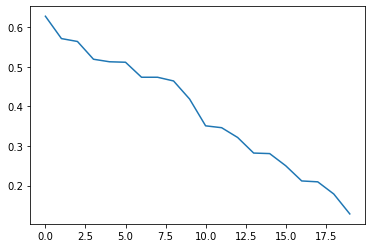

In [210]:
import matplotlib.pyplot as plt
plt.plot([confidence[rule[0]] for rule in sorted_confidence])

In [243]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target

In [244]:
attribute_means = X.mean(axis=0)

In [245]:
X_d = np.array(X >= attribute_means, dtype='int')

In [248]:
def train_feature_value(X, y_true, feature_index, value):
    class_counts = defaultdict(int)
    for sample, y in zip(X, y_true):
        if sample[feature_index] == value:
            class_counts[y] += 1
    sorted_class_counts = sorted(class_counts.items(), key=itemgetter(1), reverse=True)
    most_frequent_class = sorted_class_counts[0][0]

    incorrect_predictions = [class_count for class_value, class_count in class_counts.items() if class_value != most_frequent_class]
    error = sum(incorrect_predictions)
    return most_frequent_class, error

In [250]:
def train_on_feature(X, y_true, feature_index):
    values = set(X[:, feature_index])
    predictors = {}
    errors = []
    for current_value in values:
        most_frequent_class, error = train_feature_value(X, y_true, feature_index, current_value)
        predictors[current_value] = most_frequent_class
        errors.append(error)
    total_error = sum(errors)
    return predictors, total_error

In [251]:
from sklearn.model_selection import train_test_split
Xd_train, Xd_test, y_train, y_test = train_test_split(X_d, y, random_state=14)

In [252]:
all_predictors = {}
errors = {}
for feature_index in range(Xd_train.shape[1]):
    predictors, total_error = train_on_feature(Xd_train, y_train, feature_index)
    all_predictors[feature_index] = predictors
    errors[feature_index] = total_error

In [265]:
best_feature, best_error = sorted(errors.items(), key=itemgetter(1))[0]
print(best_feature)
print(best_error)

2
37


In [279]:
model = {'feature': best_feature, 'predictor': all_predictors[best_feature]}

In [280]:
def predict(X_test, model):
    variable = model['feature']
    predictor = model['predictor']
    y_predicted = np.array([predictor[int(sample[variable])] for sample in Xd_test])
    return y_predicted

In [281]:
y_predicted = predict(Xd_test, model)

In [282]:
accuracy = np.mean(y_predicted == y_test) * 100
print(accuracy)

65.78947368421053
